In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from skimage.external import tifffile
import seaborn as sns
from skimage.external.tifffile import imread
import os
from os import listdir
from os.path import isfile, join

In [2]:
bigDir=r'Z:\CookLab\Liu\DNAdamageAnalysis\20210110'

In [3]:
imageFolder=f'{bigDir}\\data_tiff'

In [4]:
dataFile=f'{bigDir}\\cellinfo_20210110_v7.csv'
data=pd.read_csv(dataFile)

In [5]:
data.head()

,Unnamed: 0,Unnamed: 0.1,file,original cell name,movie,ID,x,y,molecular_age,category,...,nuc_DAPI_total,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day
0,0,0,20210110_cell_00.ciz,20210110xy01_S1.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,6817731168,2354269459,4463461709,2330318547,1321232918,1009085629,4487412621,1033036541,3454376080,d20210110
1,1,1,20210110_cell_02.ciz,20210110xy01_S3.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,6516142543,2162395235,4353747308,2248349916,1239642048,1008707868,4267792627,922753187,3345039440,d20210110
2,2,2,20210110_cell_03.ciz,20210110xy01_S4.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,6386977448,2441791517,3945185931,2222657732,1285322397,937335335,4164319716,1156469120,3007850596,d20210110
3,3,3,20210110_cell_04.ciz,20210110xy01_S5.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,6825566649,2248947872,4576618777,2257515934,1292296373,965219561,4568050715,956651499,3611399216,d20210110
4,4,4,20210110_cell_05.ciz,20210110xy01_S6.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,6486096125,2365441587,4120654538,2302812319,1516125809,786686510,4183283806,849315778,3333968028,d20210110


for i, row in data.iterrows():
    newSegFolder = os.path.dirname(row.path).replace('data_tiff',f'masked_image')

    try:
        os.mkdir(newSegFolder)
    except:
        pass
    
    img=imread(row.path)
    ch=img[:,1,:,:]
    
    maskpath=row.path.replace('data_tiff','segmentation_nucleus_Otsu')
    maskpath=maskpath.replace('.tif','_nucleus.tif')
    nucMask=imread(maskpath)
    nucMask=nucMask.astype(bool)
    ch[~nucMask]=0
    
    maskFile = os.path.basename(row.path).replace('.tif',f'_masked.tif')
    tifffile.imsave(os.path.join(newSegFolder,maskFile), ch)    
    

In [6]:
data.group.unique()

array(['CTL', 'APH', 'APH+DOX', 'DOX'], dtype=object)

In [7]:
#for i, row in data.iterrows():
#    data.loc[i,'path']=data.loc[i,'path'].replace('D:\\POST_DOC\\python_practice\\cyclinE_53bp1','Z:\\CookLab\\Liu\\DNAdamageAnalysis')

In [8]:
#data.to_csv(dataFile)

In [9]:
CTL=data.loc[data.group=='CTL',:]

In [10]:
APH=data.loc[data.group=='APH',:]

In [11]:
APHDOX=data.loc[data.group=='APH+DOX',:]

In [12]:
DOX=data.loc[data.group=='DOX',:]

In [13]:
data.category.unique()

array(['LateS'], dtype=object)

In [14]:
img=imread(CTL.path[0])

In [15]:
ch=img[:,1,:,:]

In [16]:
ch.shape

(35, 380, 380)

In [17]:
resultsDir=f'{bigDir}\\foci-results'

In [18]:
path1=CTL.path[0].replace('data_tiff','foci-results')
path1=path1.replace('20210110_cell_','Results-')
path1=path1.replace('.tif','.csv')
path1

'Z:\\CookLab\\Liu\\DNAdamageAnalysis\\20210110\\foci-results\\Results-00.csv'

In [19]:
testDF=pd.read_csv(path1)

In [20]:
testDF.head()

,ImageTitle,FocusNO,CoreX,CoreY,CoreZ,Volume,AreaXY,AreaXZ,AreaYZ,Intensity,Background,MinI,MaxI,Range
0,20210110_cell_00_masked.tif,1,158.396,143.960,13.551,61,23,17,23,24441.342,4758,20065.0,35372,14936
1,20210110_cell_00_masked.tif,2,162.845,142.960,13.507,39,15,12,17,19955.719,4404,16348.5,28293,11690
2,20210110_cell_00_masked.tif,3,129.217,180.560,14.931,48,20,16,20,14463.521,4485,11869.5,19254,7345
3,20210110_cell_00_masked.tif,4,127.660,168.940,11.551,35,17,19,12,14108.201,3418,11278.0,19138,7770
4,20210110_cell_00_masked.tif,5,115.590,193.111,15.945,57,28,17,21,13572.490,3877,11425.0,18973,7542


In [35]:
testDF

AttributeError: 'DataFrame' object has no attribute 'row'

In [21]:
import math

In [25]:
z=testDF.CoreZ
y=testDF.CoreY
x=testDF.CoreX

In [26]:
fociMask=np.zeros(ch.shape)

In [27]:
fociMask[math.floor(z[0]),math.floor(y[0]),math.floor(x[0])]=1

<IPython.core.display.Javascript object>


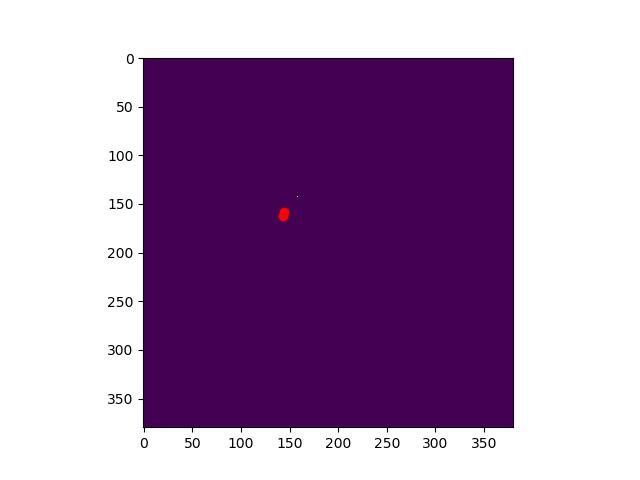

In [32]:
%matplotlib notebook
plt.imshow(fociMask[(math.floor(z[0]))])
plt.plot(y[0],x[0],'ro')
plt.plot(y[1],x[1],'ro')

In [36]:
import skimage

In [39]:
ch1=skimage.img_as_float(ch)

In [41]:
ch1[z[0],y[0],x[0]] = 0

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [42]:
ch1

array([[[0.01351949, 0.01536584, 0.0153048 , ..., 0.01773098,
         0.01550317, 0.016907  ],
        [0.01617456, 0.01811246, 0.01641871, ..., 0.01606775,
         0.01582361, 0.01567102],
        [0.01574731, 0.01579309, 0.01593042, ..., 0.01774624,
         0.0202182 , 0.01768521],
        ...,
        [0.01707485, 0.01680018, 0.01608301, ..., 0.01535058,
         0.01826505, 0.01493858],
        [0.01559472, 0.01791409, 0.0137026 , ..., 0.01550317,
         0.01347372, 0.01507591],
        [0.01849393, 0.01557946, 0.01579309, ..., 0.01557946,
         0.01402304, 0.01806668]],

       [[0.01445029, 0.01329061, 0.01339742, ..., 0.01702907,
         0.01457237, 0.01547265],
        [0.01474022, 0.01425193, 0.01441978, ..., 0.01542687,
         0.01660182, 0.01568627],
        [0.01570153, 0.01353475, 0.01565576, ..., 0.01873808,
         0.01533532, 0.01596094],
        ...,
        [0.01568627, 0.0170901 , 0.01652552, ..., 0.0158999 ,
         0.01678492, 0.01489281],
        [0.0

In [43]:
z[0].dtype

dtype('float64')

script with tukey test, plot with results